In [10]:
#Author : Antonin Grateau
#Date : February 2022

from math import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter

In [11]:
n1 = 2
n2 = 1.5
d = 300*10**(-9)

A = 16*(n1**2)*(n2**2)
B = (1+n1)**3*(n1 + n2**2)
C = 2*(1-n1**2)**3*(n2**2 - n1**2)
D = (n1 - 1)**3*(n1 - n2**2)

La transmission moyenne de la zone de transparence est :  93.12348847926266


b'Skipping line 5: expected 1 fields, saw 2\n'


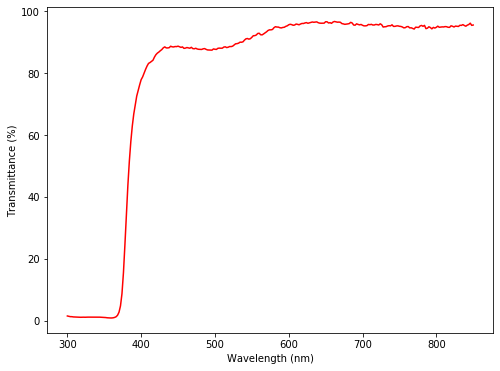

In [12]:
data = pd.read_csv('spectre.txt', error_bad_lines=False)
wavelength = []
transmission = []
for index, row in data.iterrows():
    line = row['#'].split("\t")
    if index > 5:
        wavelength.append(float(line[0]))
        transmission.append(float(line[1]))
wavelength.reverse()
transmission.reverse()

mean = 0
t = 0
for i in range(len(transmission)):
    if transmission[i]>85:
        mean += transmission[i]
        t += 1
print('La transmission moyenne de la zone de transparence est : ', mean/t)
plt.figure(figsize=(8,6))
plt.plot(wavelength, transmission, color='red', label='Transmission oxyde de Zinc')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance (%)')
plt.show()

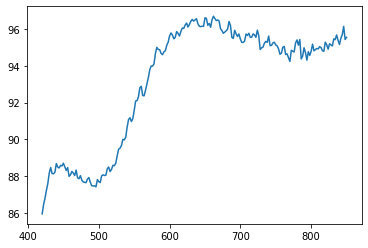

In [13]:
plt.plot(wavelength[60:], transmission[60:])

In [14]:
def lissage(list):
    copy = [0]*len(list)
    copy[0] = list[0]
    for j in range(1,len(list)):
        copy[j] = (list[j] + list[j-1])/2
    return(copy)

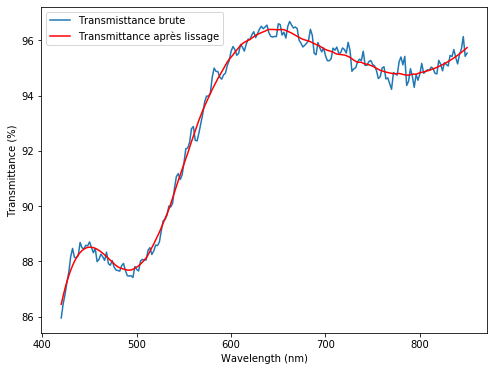

In [15]:

W = wavelength[60:]
T = savgol_filter(transmission[60:], 51, 3)

plt.figure(figsize=(8,6))
plt.plot(wavelength[60:], transmission[60:], label='Transmisttance brute')
plt.plot(W,T, color='red', label='Transmittance après lissage')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Transmittance (%)')
plt.legend()
plt.show()

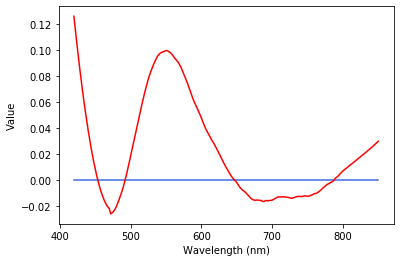

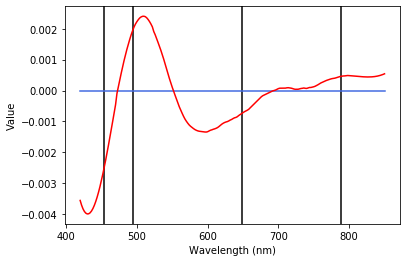

[494.0, 788.0] [454.0, 648.0]


In [16]:
def derivative(list):
    copy = [0]*len(list)
    for i in range(1,len(list)):
        copy[i] = (list[i] - list[i-1])/2
    return(copy)

derivative_T = savgol_filter(derivative(T), 51, 3)
derivative_2_T = savgol_filter(derivative(derivative_T), 51, 3)

plt.plot(W, [0 for i in W], color='royalblue')
plt.plot(W, derivative_T, color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Value')
plt.show()
plt.axvline(x=454, ymin=0, ymax=1, color='black')
plt.axvline(x=494, ymin=0, ymax=1, color='black')
plt.axvline(x=648, ymin=0, ymax=1, color='black')
plt.axvline(x=788, ymin=0, ymax=1, color='black')
plt.plot(W, [0 for w in W], color='royalblue')
plt.plot(W, derivative_2_T, color='red')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Value')
plt.show()

min = []
max = []
for i in range(1,len(derivative_T)):
    if np.sign(derivative_T[i]*derivative_T[i-1]) < 0:
        if derivative_2_T[i] > 0:    
            min.append(W[i])
        else:
            max.append(W[i])
print(min, max)
    

In [17]:
print(1/2/n1*(min[1]*min[0])/(min[1]-min[0]))

331.01360544217687


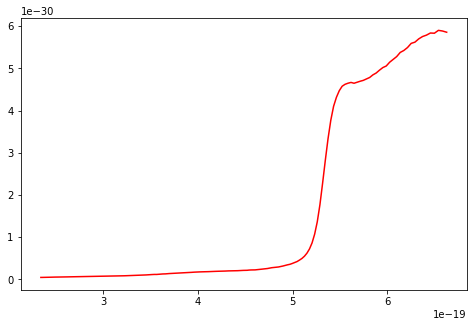

6.626099999999999e-19
35
49


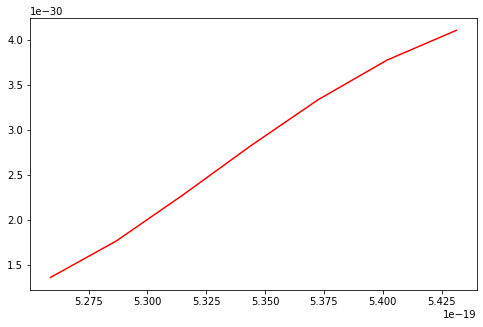

1.5148811183397522e-10
3.2235047486616653


In [39]:
#Question 3

d = 331.01360544217687*1e-9
h = 6.6261*10**(-34)
c = 3*10**8

'''def alpha(value_T):
    return(1/d*log(A/B/value_T,e))

value_x = []
value_y = []
indexes = []
for i in range(len(wavelength)):
    var = h*c/(wavelength[i]*1e-9)
    indexes.append(i)
    value_x.append(var)
    value_y.append(alpha(transmission[i]/100)*var**2)

print(len(value_x))
plt.plot(value_x[33:40],value_y[33:40])
plt.show()
plt.plot(value_x,value_y)
plt.show()

pente = (value_y[40] - value_y[33])/(value_x[40] - value_x[33])

print(value_y[36]-(pente*value_x[36]))'''

alpha_values = [1/d*np.log(A/B/(T_value/100)) for T_value in transmission]

values_x = []
values_y = []

for i in range(len(wavelength)):
    values_x.append(h*c/(wavelength[i]*1e-9))
    values_y.append(alpha_values[i]*(h*c/(wavelength[i]*1e-9))**2)
    
plt.figure(figsize=(8,5))
plt.plot(values_x,values_y, color='red')
plt.show()

check1 = values_x[0]
print(check1)
i = 0
while check1 > (5.4*1e-19):
    i+=1
    check1 = values_x[i]
print(i)
while check1 > (5*1e-19):
    i+=1
    check1 = values_x[i]
print(i)

plt.figure(figsize=(8,5))
plt.plot(values_x[33:40],values_y[33:40], color='red')
plt.show()

F = (values_y[40]-values_y[33])/(values_x[40]-values_x[33])
print(F)

E_gap = -(values_y[36]/F-values_x[36])
print(E_gap/(1.6e-19))

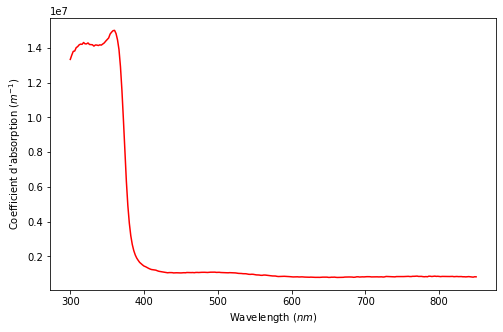

In [43]:
#Spectre d'absorption

plt.figure(figsize=(8,5))
plt.plot(wavelength,alpha_values,color='red')
plt.ylabel("Coefficient d'absorption ($m^{-1}$)")
plt.xlabel("Wavelength ($nm$)")
plt.show()